设置学习率

In [44]:
import math
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.nn import Conv2d


lr_rate = 0.01
model = Conv2d(3, 3, 1, 1)
optimizer = optim.SGD(model.parameters(), lr=lr_rate, momentum=0.9, nesterov=True)

设置学习率退火曲线，实现Cosine退火

In [57]:
'''
lr_rate:        初始学习率
total_epoch:    总的学习周期
warm_epoch:     起始warm-up周期个数
min_factor:     最小的学习率不低于： lr_rate * min_factor
'''
def cosine_lr_decay(optimizer, total_epoch, warm_epoch=3, min_factor=0.01):
    n_t = 0.5
    cosine_epoch = total_epoch - warm_epoch
    lambda1 = lambda epoch: (0.9*epoch / warm_epoch+0.1) if epoch < warm_epoch else  min_factor  if n_t * (1+math.cos(math.pi*(epoch - warm_epoch)/cosine_epoch))<min_factor else n_t * (1+math.cos(math.pi*(epoch - warm_epoch)/cosine_epoch))
    
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

    return scheduler

In [58]:
t = 20
T = 110
scheduler = cosine_lr_decay(optimizer, total_epoch=T, warm_epoch=t)

In [59]:
index = 0
x = []
y = []
for epoch in range(T):
    optimizer.step()
    x.append(index)
    y.append(optimizer.param_groups[0]['lr'])
    index += 1
    scheduler.step()

可视化学习率曲线

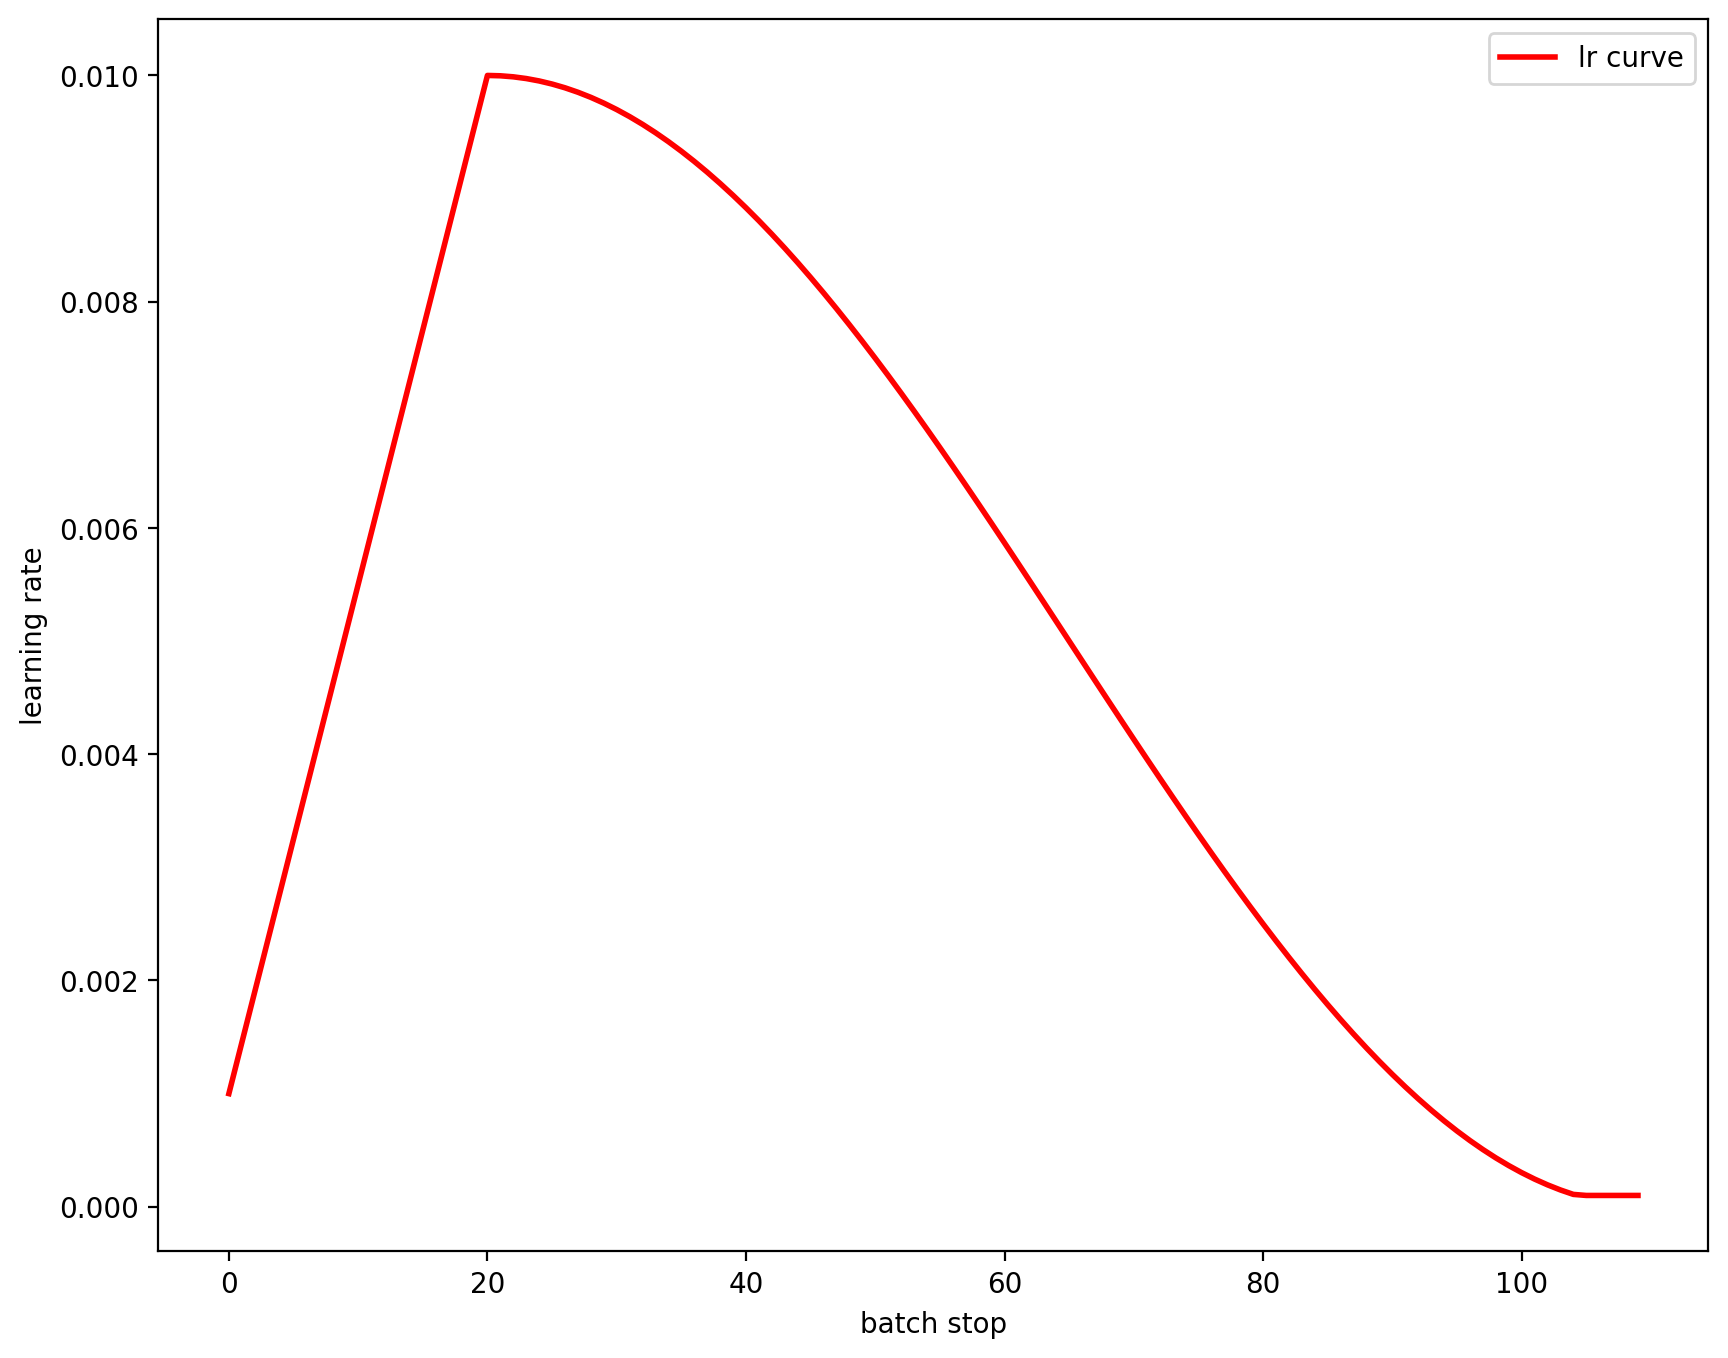

In [60]:
plt.figure(figsize=(10, 8), dpi=200)
plt.xlabel('batch stop')
plt.ylabel('learning rate')
plt.plot(x, y, color='r', linewidth=2.0, label='lr curve')
plt.legend(loc='upper right')
# plt.savefig('result.png')
plt.show()